# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Calculate the PDF from a given dataset containing real-valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn

## Let's get started

Let's import the necessary libraries for this lab.

In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [207]:
data = pd.read_csv("weight-height.csv")
male_df = data.query("Gender == 'Male'")
female_df = data.query("Gender == 'Female'")

print("Males", male_df.iloc[:, 1:].agg(["mean", "std"]), "", sep="\n")
print("Females", female_df.iloc[:, 1:].agg(["mean", "std"]), sep="\n")

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Males
         Height      Weight
mean  69.026346  187.020621
std    2.863362   19.781155

Females
         Height      Weight
mean  63.708774  135.860093
std    2.696284   19.022468


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- use binsize = 10, set alpha level so that overlap can be visualized

In [221]:
male_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


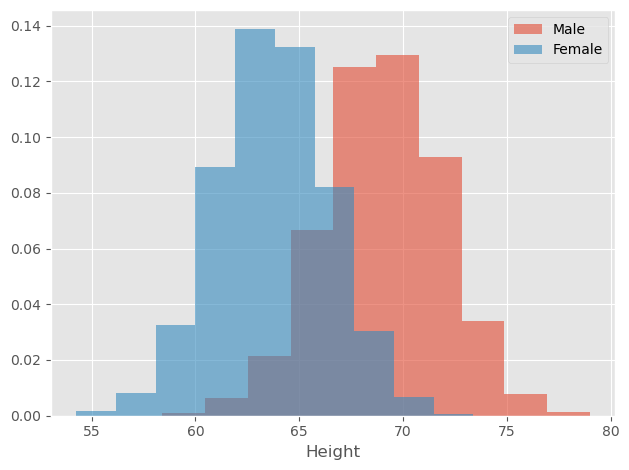

In [229]:
# Your code here
fig, ax = plt.subplots()

ax.hist(x=male_df["Height"], density=True, alpha=0.6, bins=10)
ax.hist(x=female_df["Height"], density=True, alpha=0.6, bins=10)
ax.legend(["Male", "Female"])
ax.set_xlabel("Height")

plt.tight_layout()

Record your observations - are these inline with your personal observations?

Males tend to be taller on average, the two distributions seem to follow a similar distribution.

## Create a density function using interpolation


- Write a densit function density() that uses interpolation and takes in a random variable
- Use`np.hist`
- The function should return two lists carrying x and y coordinates for plotting the density function

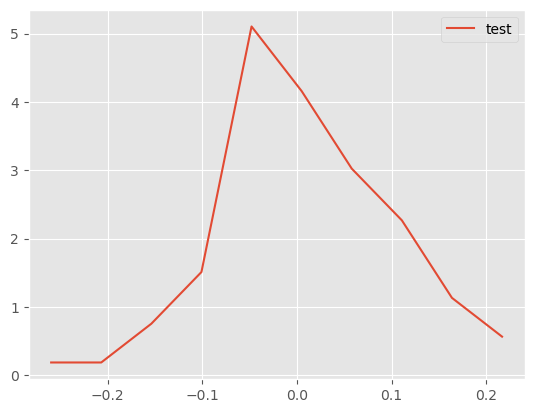

In [214]:
def density(x):
    n, bins = np.histogram(x, density=True)

    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    # Interpolate through histogram bins 
    # identify middle point between two neighboring bins, in terms of x and y coords
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]

    return pdfx, pdfy


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add Overlapping density plots to the histograms plotted earlier

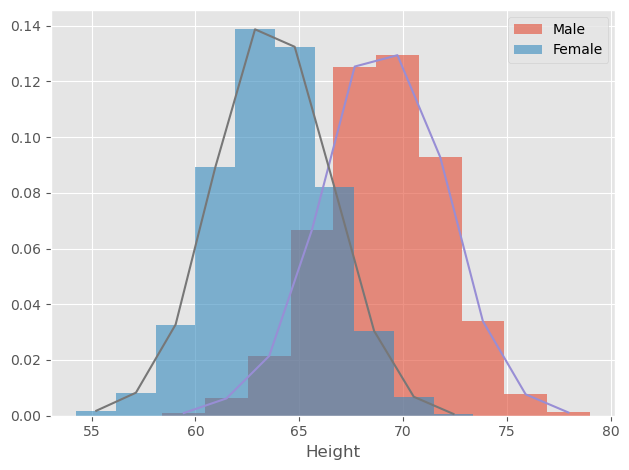

In [231]:
# Your code here
fig, ax = plt.subplots()

ax.hist(x=male_df["Height"], density=True, alpha=0.6, bins=10)
ax.hist(x=female_df["Height"], density=True, alpha=0.6, bins=10)
ax.legend(["Male", "Female"])
ax.set_xlabel("Height")

# add kde
x, y = density(male_df.Height)
ax.plot(x, y)

x, y = density(female_df.Height)
ax.plot(x, y)


plt.tight_layout()

## Repeat above exerice for male and female weights

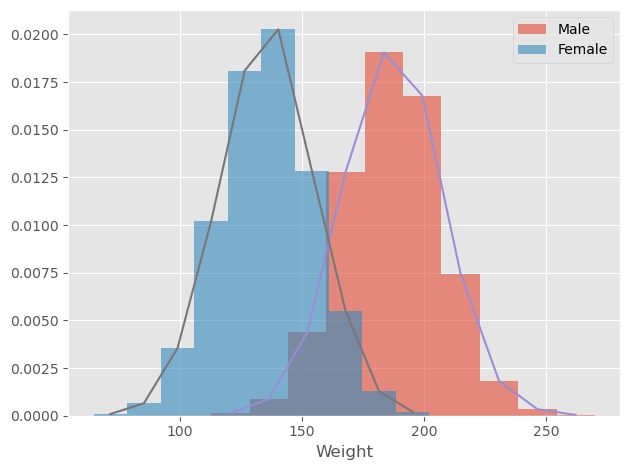

In [233]:
# Your code here 
# Your code here
fig, ax = plt.subplots()

ax.hist(x=male_df["Weight"], density=True, alpha=0.6, bins=10)
ax.hist(x=female_df["Weight"], density=True, alpha=0.6, bins=10)
ax.legend(["Male", "Female"])
ax.set_xlabel("Weight")

# add kde
x, y = density(male_df.Weight)
ax.plot(x, y)

x, y = density(female_df.Weight)
ax.plot(x, y)


plt.tight_layout()

## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?
# Both in height and weight the two distibutions follow a similar pattern

# What is the takeaway when comparing male and female heights and weights?

## Repeat Above experiments in seaborn and compare with your results

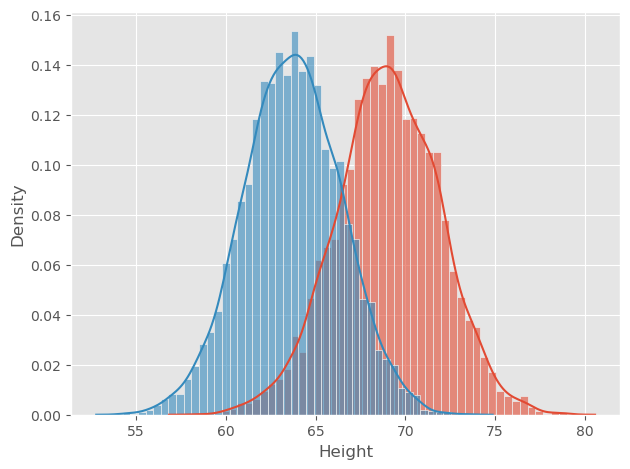

In [261]:
import seaborn as sns

# Code for heights here
fig, ax = plt.subplots()

sns.histplot(data=male_df, x="Height", stat="density", ax=ax, alpha=0.6)
sns.kdeplot(data=male_df, x="Height", ax=ax)

sns.histplot(data=female_df, x="Height", stat="density", ax=ax, alpha=0.6)
sns.kdeplot(data=female_df, x="Height", ax=ax)

plt.tight_layout()

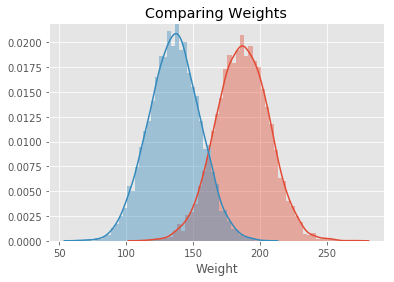

In [24]:
# Code for heights here
fig, ax = plt.subplots()

sns.histplot(data=male_df, x="Height", stat="density", ax=ax, alpha=0.6)
sns.kdeplot(data=male_df, x="Height", ax=ax)

sns.histplot(data=female_df, x="Height", stat="density", ax=ax, alpha=0.6)
sns.kdeplot(data=female_df, x="Height", ax=ax)

plt.tight_layout()

In [263]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

# the seaborn kde approach is much easier and the plots look more professional with less effort.

## Summary

In this lesson you learned how to build the probability density curves visually for a given datasets, and compare the distributions visually by looking at the spread, center and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.